## Data Prep

In [1]:
!wget https://www.dropbox.com/sh/tixllucoctgjhib/AAASkviFEYjtetGzUmfrld8oa?dl=1

--2020-10-30 13:58:40--  https://www.dropbox.com/sh/tixllucoctgjhib/AAASkviFEYjtetGzUmfrld8oa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/tixllucoctgjhib/AAASkviFEYjtetGzUmfrld8oa [following]
--2020-10-30 13:58:40--  https://www.dropbox.com/sh/dl/tixllucoctgjhib/AAASkviFEYjtetGzUmfrld8oa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb57a838353b6697cbc58c8ec9d.dl.dropboxusercontent.com/zip_download_get/Alr_G0mdbi4vI9PkxUiweJQL0kjVuZSA7JoBk6mWM3lQkovprC_9K3BzNKrRYoE4_1-DkRwpnHgD9l6YI8EsfYINUBJjwvu6VTlkHQrz5IHE9g?dl=1 [following]
--2020-10-30 13:58:42--  https://ucb57a838353b6697cbc58c8ec9d.dl.dropboxusercontent.com/zip_download_get/Alr_G0mdbi4vI9PkxUiweJQL0kjVuZSA7JoBk6mWM3lQkovprC_9K3BzNKrRYoE4_1-DkRwpnHgD9l

In [2]:
import os
os.mkdir("Train")

In [3]:
import zipfile
with zipfile.ZipFile("AAASkviFEYjtetGzUmfrld8oa?dl=1","r") as zip_ref:
    zip_ref.extractall("Train")

In [4]:
classes = [
    "Aerodactyl",  
    "Bulbasaur",  
    "Charmander", 
    "Dratini",  
    "Fearow",  
    "Meowth",  
    "Pikachu",  
    "Psyduck",  
    "Spearow",  
    "Squirtle"
]

labels_dict = {}

for idx,name in enumerate(classes):
    labels_dict[name] = idx

print(labels_dict)

{'Aerodactyl': 0, 'Bulbasaur': 1, 'Charmander': 2, 'Dratini': 3, 'Fearow': 4, 'Meowth': 5, 'Pikachu': 6, 'Psyduck': 7, 'Spearow': 8, 'Squirtle': 9}


In [5]:
from keras.preprocessing import image

In [6]:
image_data = []

labels = []

for fname in classes:
    path = os.path.join("Train", fname)

    print(path)
    for img_path in os.listdir(path):

        # print(os.path.join(path, img_path))

        try:
            img = image.load_img(os.path.join(path, img_path), target_size=(224, 224))
            img = image.img_to_array(img)/255.0
            image_data.append(img)
            labels.append(labels_dict[fname])

        except:

            continue


Train/Aerodactyl
Train/Bulbasaur
Train/Charmander


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train/Dratini
Train/Fearow
Train/Meowth
Train/Pikachu
Train/Psyduck
Train/Spearow
Train/Squirtle


In [7]:
import matplotlib.pyplot as plt

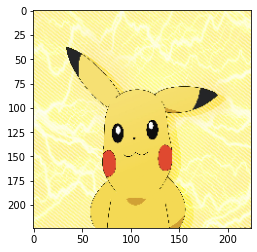

In [8]:
plt.imshow(image_data[999])
plt.show()

In [9]:
print(len(image_data))
print(len(labels))

1645
1645


In [10]:
# Shuffling the data

import random

combined = list(zip(image_data, labels))

random.shuffle(combined)

# Unpacking

image_data[:], labels[:] = zip(*combined)

In [11]:
import numpy as np

In [12]:
print(np.unique(labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 80, 255, 264,  98, 109,  63, 268, 143, 117, 248]))


In [13]:
X_train = np.array(image_data)
Y_train = np.array(labels)

In [14]:
print(X_train.shape, Y_train.shape)

(1645, 224, 224, 3) (1645,)


In [15]:
 ## One hot encoding Y_train
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train)

In [16]:
print(X_train.shape, Y_train.shape)

(1645, 224, 224, 3) (1645, 10)


In [17]:
from sklearn.model_selection import train_test_split
XT,XV,YT,YV = train_test_split(X_train, Y_train, test_size = 0.20)
print(XT.shape, YT.shape)
print(XV.shape, YV.shape)

(1316, 224, 224, 3) (1316, 10)
(329, 224, 224, 3) (329, 10)


## Image Augmentation on Training Data

In [18]:
from imgaug import augmenters as iaa

In [19]:

seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-15, 15),
        shear=(-2, 2)
    ),
    # iaa.GaussianBlur(sigma=(0, 3.0))
    # iaa.PiecewiseAffine(scale=(0.01, 0.05)) # Distort images locally
    
])

In [20]:
X_train_aug = []

for img in XT:

    batch = img.reshape((1, *img.shape))
    output = seq(images = batch)
    X_train_aug.append(output[0])

In [21]:
X_train_aug = np.array(X_train_aug)
YT = np.array(YT)
XT = np.array(XT)
XV = np.array(XV)
YV = np.array(YV)

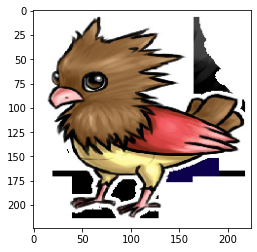

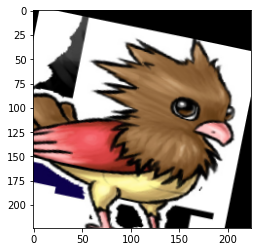

In [22]:
plt.imshow(XT[177])
plt.show()
plt.imshow(X_train_aug[177])
plt.show()

## Inception ResNetV2

In [23]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.layers import *
from keras.models import Model
from keras.optimizers import Adam

In [24]:
model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# resNXT = preprocess_input(X_train_aug)
# resNXV = preprocess_input(XV)

219062272/219055592 [==============================] - 5s 0us/step


In [25]:
# This is our custom Classifier
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256, activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(10, activation='softmax')(d1)

In [26]:
model_new = Model(inputs= model.input, outputs = fc2)
# model_new.summary()

adam = Adam(learning_rate=0.00003)

# Compiling the model

model_new.compile(
    loss= 'categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

In [27]:
# Indexes of the layers
for ix in range(len(model_new.layers)):

    print(ix, model_new.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9cdd53c358>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9cdfc0bba8>
2 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9cdd522e48>
3 <tensorflow.python.keras.layers.core.Activation object at 0x7f9cdd4d3b00>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9cdd4d3be0>
5 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9cd00bc780>
6 <tensorflow.python.keras.layers.core.Activation object at 0x7f9cd00bcb38>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9cd00bcb70>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9cd00620b8>
9 <tensorflow.python.keras.layers.core.Activation object at 0x7f9cd0062470>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9cd00624a8>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9cd007

In [28]:
# Freezing the layers from 0 to 769
for ix in range(770):

    model_new.layers[ix].trainable = False

# Compiling the model again after freezing

model_new.compile(
    loss= 'categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)
model_new.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [29]:
hist = model_new.fit(X_train_aug,
                     YT,
                     shuffle= True,
                     batch_size= 16,
                     epochs= 50,
                     validation_data = (XV, YV)
                     )

Epoch 1/50
83/83 [==============================] - 11s 134ms/step - loss: 2.0600 - accuracy: 0.2812 - val_loss: 1.6986 - val_accuracy: 0.4043
Epoch 2/50
83/83 [==============================] - 8s 97ms/step - loss: 1.5332 - accuracy: 0.4992 - val_loss: 1.3802 - val_accuracy: 0.5745
Epoch 3/50
83/83 [==============================] - 8s 97ms/step - loss: 1.2572 - accuracy: 0.6284 - val_loss: 1.1500 - val_accuracy: 0.6991
Epoch 4/50
83/83 [==============================] - 8s 97ms/step - loss: 1.0556 - accuracy: 0.6854 - val_loss: 1.0228 - val_accuracy: 0.7112
Epoch 5/50
83/83 [==============================] - 8s 97ms/step - loss: 0.9438 - accuracy: 0.7287 - val_loss: 0.9267 - val_accuracy: 0.7356
Epoch 6/50
83/83 [==============================] - 8s 97ms/step - loss: 0.8033 - accuracy: 0.7827 - val_loss: 0.8111 - val_accuracy: 0.7599
Epoch 7/50
83/83 [==============================] - 8s 97ms/step - loss: 0.7148 - accuracy: 0.8040 - val_loss: 0.7351 - val_accuracy: 0.7842
Epoch 8/50


In [30]:
h = hist.history

## Loss And Accuracy

In [31]:
plt.style.use('seaborn')

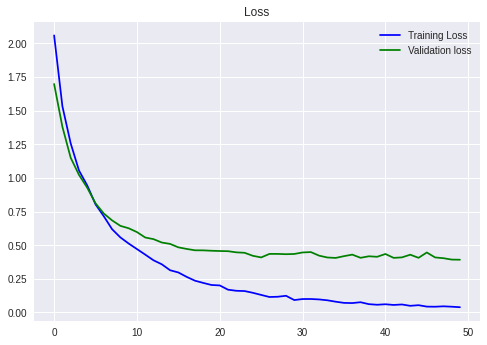

In [32]:
plt.plot(h['loss'], c='blue', label='Training Loss')
plt.plot(h['val_loss'], c= 'green', label= 'Validation loss')
plt.title("Loss")
plt.legend()
plt.show()

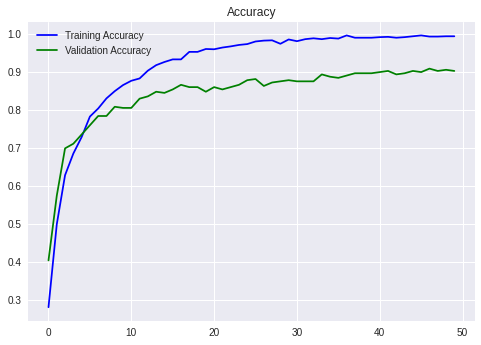

In [33]:
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c= 'green', label= 'Validation Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()